# Calculations with PmagPy

This notebook demonstrates many of the PmagPy calculation functions such as those that rotate directions, return statistical parameters, and simulate data from specified distributions.

## Guide to PmagPy

The notebook is one of a series of notebooks that demonstrate the functionality of PmagPy. The other notebooks are:

- [PmagPy_introduction.ipynb](PmagPy_introduction.ipynb) This notebook introduces PmagPy and lists the functions that are demonstrated in the other notebooks. 
- [PmagPy_plots_analysis.ipynb](PmagPy_plots_analysis.ipynb) This notebook demonstrates PmagPy functions that can be used to visualize data as well as those that conduct statistical tests that have associated visualizations.
- [PmagPy_MagIC.ipynb](PmagPy_MagIC.ipynb) This notebook demonstrates how PmagPy can be used to read and write data to and from the MagIC database format including conversion from many individual lab measurement file formats.

## Customizing this notebook

If you want to make changes to this notebook, you should make a copy (see File menu).  Otherwise each time you update **PmagPy**, your changes will be overwritten.

## Get started

To use the functions in this notebook, we have to   import the **PmagPy** modules **pmagplotlib**, **pmag** and **ipmag** and some other handy functions for use in the notebook.  This is done in the following code block which must be executed before running any other code block. To execute, click on the code block and then click on the "Run" button in the menu.  

In order to access the example data, this notebook is meant to be run in the PmagPy-data directory (PmagPy directory for developers).

Try it!  Run the code block below (click on the cell and then click 'Run'):

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt # our plotting buddy
from pmagpy import convert_2_magic as convert
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
from IPython.display import Image
%matplotlib inline 

## Functions demonstrated within this notebook:

- Functions in **PmagPy_calculations.ipynb**:
    - [aarm_magic](#aarm_magic) : calculate AARM tensors
    - [atrm_magic](#aarm_magic) : calculate ATRM tensors
    - [angle](#angle) : calculates the angle between two vectors
    - [apwp](#apwp) : returns predicted paleolatitudes, directions and pole latitude/longitude from apparent polar wander paths of Besse and Courtillot (2002).
    - [b_vdm](#b_vdm) : converts B (in microT) and (magnetic) latitude to V(A)DM (see [vdm_b](#vdm_b))
    - [bootams](#bootams) : calculates bootstrap statistics for tensor data
    - [cart_dir](#cart_dir) : converts cartesian coordinates (x,y,z) to declination, inclination, intensity (see [dir_cart](#dir_cart))
    - [di_eq](#di_eq) : maps declination, inclinatitions to X,Y for plotting in equal area projections
    - [di_geo](#di_geo) : rotates declination, inclination in specimen coordinates to geographic coordinates
    - [di_rot](#di_rot) : rotates directions to a  coordinate system with D,I as center
    - [di_tilt](#di_tilt) : rotates directions to stratigraphic coordinates
    - [di_vgp](#di_vgp) : converts direction to Virtual Geomagnetic Pole (see [vgp_di](#vgp_di))
    - [dia_vgp](#dia_vgp) : converts direction and $\alpha_{95}$ to Virtual Geomagnetic Pole and dp,dm
    - [dipole_pinc](#dipole_pinc) : calculates inclination given latitude assuming geocentric axial dipole
    - [dipole_plat](#dipole_plat) : calculates latitude given inclination assuming geocentric axial dipole
    - [dir_cart](#dir_cart) : converts declination, inclination, intensity to cartesian coordinates (see [cart_dir](#cart_dir))
    - [eigs_s](#eigs_s) : converts eigenparameters to equivalent 6 element tensor (see [s_eigs](#s_eigs))
    - [eq_di](#eq_di) : takes X,Y from equal area projection (e.g., from digitized coordinates) and  converts to declination, inclination
    - [fcalc](#fcalc) : returns the value from an F table, given the degrees of freedom.
    - [fisher](#fisher) : generates sets of directions drawn from Fisher distributions with vertical true mean
    - [fishrot](#fishrot) : generates sets of directions drawn from Fisher distributions with arbitrary true mean
    - [flip](#flip) : flips a second mode (reverse directions) to their antipodes
    - [gaussian](#gaussian) : generates data drawn from a normal distribution
    - [gobing](#gobing) : calculates Bingham statistics from a set of directions
    - [gofish](#gofish) : calculates Fisher statistics from a set of directions
    - [gokent](#gokent) : calculates Kent statistics from a set of directions
    - [goprinc](#goprinc) : calculates principal directions statistics
    - [igrf](#igrf) : calculates geomagnetic field vectors for location, age given a field model (e.g., IGRF) including paleofield models (e.g., cals10k)
    - [incfish](#incfish) : estimates the true mean inclination from inclination only data
    - [pca](#pca) : calculates the best-fit line or plane for demagnetization data and associated statistics
    - [pt_rot](#pt_rot) : rotates point given finite rotation pole
    - [s_eigs](#s_eigs) : takes a 6 element tensor and calculates eigen parameters (see [eigs_s](#eigs_s))
    - [s_geo](#s_geo) : rotates 6 element tensors to geographic coordinates
    - [s_hext](#s_hext) : calculates Hext statistics from 6 element tensors
    - [s_tilt](#s_tilt) : rotates 6 element tensors to stratigraphic coordinates
    - [s_magic](#s_tilt) :
    - [scalc](#scalc) : calculates  VGP scatter
    - [scalc_magic](#scalc) : calculates  VGP scatter
    - [separate_directions](#separate_directions) : separates a set of directions into two modes (normal and reverse)
    - [squish](#squish): flattens inclination data given flattening factor (see [unsquish](#unsquish))
    - [sundec](#sundec) : calulates direction to sun for location, date, time and sun azimuth
    - [tk03](#tk03) : generates sets of directions consistent with the TK03 field model
    - [uniform](#uniform) : generates sets of uniformly distributed directions
    - [unsquish](#unsquish) : unsquishes flattened inclinations, given flattening factor (see [squish](#squish))
    - [vdm_b](#vdm_b) : calculates intensity at given location from specified virtual dipole moment (see [b_vdm](#b_vdm))
    - [vector_mean](#vector_mean) : calculates vector mean for sets of vectors (declination, inclination, intensity)
    - [vgp_di](#vgp_di) : calculates direction at given location from virtual geomagnetic pole (see [di_vgp](#di_vgp))
    - [watsons_f](#watsons_f) : calculates Watson's F statistic for testing for common mean

## aarm_magic

[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#aarm_magic.py)

Anisotropy of anhysteretic or other remanence can be converted to a tensor and used to correct natural remanence data for the effects of anisotropy remanence acquisition. For example, directions may be deflected from the geomagnetic field direction or intensities may be biased by strong anisotropies in the magnetic fabric of the specimen. By imparting an anhysteretic or thermal remanence in many specific orientations, the anisotropy of remanence acquisition can be characterized and used for correction. We do this for anisotropy of anhysteretic remanence (AARM) by imparting an ARM in 9, 12 or 15 positions. Each ARM must be preceded by an AF demagnetization step. The 15 positions are shown in the [k15_magic](#k15_magic) example.

For the 9 position scheme, **aarm_magic** assumes that the AARMs are imparted in positions 1,2,3, 6,7,8, 11,12,13. Someone (a.k.a. Josh Feinberg) has kindly made the measurements and saved them an SIO formatted measurement file named aarm_magic_example.dat in the datafile directory called aarm_magic. Note the special format of these files - the treatment column (column #2) has the position number (1,2,3,6, etc.) followed by either a “00” for the obligatory zero field baseline step or a “10” for the in-field step. These could also be ‘0‘ and ‘1’.

We need to first import these into the measurements format and then calculate the anisotropy tensors. These can then be plotted or used to correct paleointensity or directional data for anisotropy of remanence.

So, first follow the instructions in  [sio_magic](#sio_magic) to import the AARM data into the MagIC format. The DC field was 50 μT, the peak AC field was 180 mT, the location was "Bushveld" and the lab protocol was AF and Anisotropy. The naming convention used Option # 3 (see help menu).

Then we need  to calculate the best-fit tensor and write them out to the specimens.txt MagIC tables which can be used to correct remanence data for anisotropy. 

The **aarm_magic** program takes a measurements.txt formatted file with anisotropy of ARM data in it and calculates the tensors, rotates it into the desired coordinate system and stores the data in a specimens.txt format file.  To do this in a notebook, use **ipmag.aarm_magic()**.  

In [2]:
convert.sio('arm_magic_example.dat',dir_path='data_files/aarm_magic/',specnum=3,
           location='Bushveld',codelist='AF:ANI',samp_con='3',
           meas_file='aarm_measurements.txt',peakfield=180,labfield=50, phi=-1, theta=-1)

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org
-I- overwriting /Users/nebula/Python/PmagPy/data_files/aarm_magic/specimens.txt
-I- 7 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/aarm_magic/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/aarm_magic/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/aarm_magic/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/aarm_magic/aarm_measurements.txt
-I- 126 records written to measurements file


(True,
 '/Users/nebula/Python/PmagPy/data_files/aarm_magic/aarm_measurements.txt')

In [3]:
help(ipmag.aarm_magic)

Help on function aarm_magic in module pmagpy.ipmag:

aarm_magic(infile, dir_path='.', input_dir_path='', spec_file='specimens.txt', samp_file='samples.txt', data_model_num=3, coord='s')
    Converts AARM  data to best-fit tensor (6 elements plus sigma)
    
    Parameters
    ----------
    infile : str
        input measurement file
    dir_path : str
        output directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    spec_file : str
        input/output specimen file name, default "specimens.txt"
    samp_file : str
        input sample file name, default "samples.txt"
    data_model_num : number
        MagIC data model [2, 3], default 3
    coord : str
        coordinate system specimen/geographic/tilt-corrected,
        ['s', 'g', 't'], default 's'
    
    Returns
    ---------
    Tuple : (True or False indicating if conversion was sucessful, output file name written)
    
    Info
    ---------
        Input for

In [4]:
ipmag.aarm_magic('aarm_measurements.txt',dir_path='data_files/aarm_magic/')

7  records written to file  /Users/nebula/Python/PmagPy/data_files/aarm_magic/specimens.txt
specimen data stored in /Users/nebula/Python/PmagPy/data_files/aarm_magic/specimens.txt


(True, '/Users/nebula/Python/PmagPy/data_files/aarm_magic/specimens.txt')

(True, [])

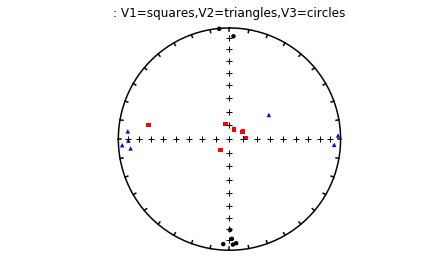

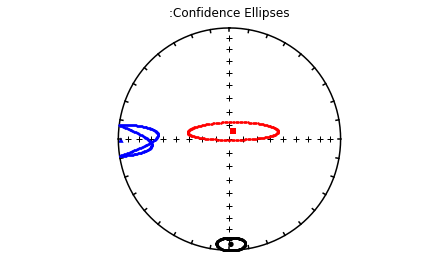

In [135]:
# plot the data generated by aarm_magic:
ipmag.aniso_magic_nb(infile='data_files/aarm_magic/specimens.txt', save_plots=False)

## atrm_magic

[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#atrm_magic.py)

Anisotropy of thermal remanence (ATRM) is similar to anisotropy of anhysteretic remanence (AARM) and the procedure for obtaining the tensor is also similar. Therefore, the **atrm_magic** is quite similar to [aarm_magic](#aarm_magic). However, the SIO lab procedures for the two experiments are somewhat different. In the ATRM experiment, there is a single, zero field step at the chosen temperature which is used as a baseline. We use only six positions (as opposed to nine for AARM) because of the additional risk of alteration at each temperature step. The positions are also different:



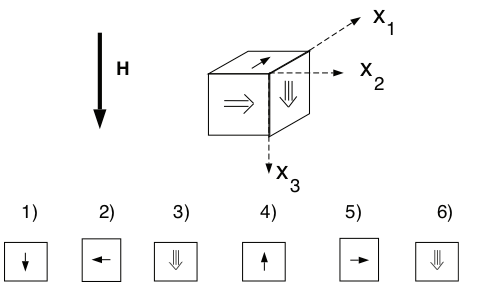

In [7]:
Image('data_files/Figures/atrm_meas.png')

The file atrm_magic_example.dat in the data_files/atrm_magic directory is an SIO formatted data file containing ATRM measurement data done in a temperature of 520∘C. Note the special format of these files - the treatment column (column 2) has the temperature in centigrade followed by either a “00” for the obligatory zero field baseline step or a “10” for the first postion, and so on. These could also be ‘0‘ and ‘1’, etc..

Follow the instructions for  [sio_magic](#sio_magic) to import the ATRM data into the MagIC format. The DC field was 40 μT. The sample/site naming convention used option # 1 (see help menu) and the specimen and sample name are the same (specnum=0). 

We will use **ipmag.atrm_magic()** to calculate the best-fit tensor and write out the MagIC tables which can be used to correct remanence data  for the effects of remanent anisotropy.



In [8]:
convert.sio('atrm_magic_example.dat',dir_path='data_files/atrm_magic/',specnum=0,
           location='unknown',codelist='T:ANI',samp_con='1',
           meas_file='measurements.txt',labfield=40, phi=-1, theta=-1)

-I- overwriting /Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt
-I- 30 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/atrm_magic/samples.txt
-I- 30 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/atrm_magic/sites.txt
-I- 10 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/atrm_magic/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/atrm_magic/measurements.txt
-I- 210 records written to measurements file


(True, '/Users/nebula/Python/PmagPy/data_files/atrm_magic/measurements.txt')

In [9]:
help(ipmag.atrm_magic)

Help on function atrm_magic in module pmagpy.ipmag:

atrm_magic(meas_file, dir_path='.', input_dir_path='', input_spec_file='specimens.txt', output_spec_file='specimens.txt', data_model_num=3)
    Converts ATRM  data to best-fit tensor (6 elements plus sigma)
    
    Parameters
    ----------
    meas_file : str
        input measurement file
    dir_path : str
        output directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    input_spec_file : str
        input specimen file name, default "specimens.txt"
    output_spec_file : str
        output specimen file name, default "specimens.txt"
    data_model_num : number
        MagIC data model [2, 3], default 3
    
    Returns
    ---------
    Tuple : (True or False indicating if conversion was sucessful, output file name written)



In [10]:
ipmag.atrm_magic('measurements.txt',dir_path='data_files/atrm_magic')

30  records written to file  /Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt
specimen data stored in /Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt


(True, '/Users/nebula/Python/PmagPy/data_files/atrm_magic/specimens.txt')

## angle

[\[Essentials Appendix A.3.4\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap1.html#x20-215000A.3.4) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#angle.py)

**angle** calculates the angle $\alpha$ between two declination,inclination pairs.

There are several ways to use this function from the notebook - one loading the data into a Pandas dataframe, then converting to the desired arrays, or load directly into a **Numpy** array of desired shape.  

In [11]:
help(pmag.angle)

Help on function angle in module pmagpy.pmag:

angle(D1, D2)
    Calculate the angle between two directions.
    
    Parameters
    ----------
    D1 : Direction 1 as an array of [declination, inclination] pair or pairs
    D2 : Direction 2 as an array of [declination, inclination] pair or pairs
    
    Returns
    -------
    angle : angle between the directions as a single-element array
    
    Examples
    --------
    >>> pmag.angle([350.0,10.0],[320.0,20.0])
    array([ 30.59060998])



In [12]:
# Pandas way:
di=pd.read_csv('data_files/angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']

Here's the sort of data  in the file: 

In [13]:
di.head()

,Dec1,Inc1,Dec2,Inc2
0,11.2,32.9,6.4,-42.9
1,11.5,63.7,10.5,-55.4
2,11.9,31.4,358.1,-71.8
3,349.6,36.2,356.3,-45.0
4,60.3,63.5,58.9,-56.6


Now we will use **pmag.angle()** to calculate the angles.  

In [14]:
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

array([ 75.92745193, 119.10251273, 103.65330599,  81.42586582,
       120.1048559 , 100.8579262 ,  95.07347774,  74.10981614,
        78.41266977, 120.05285684, 114.36156914,  66.30664335,
        85.38356936,  95.07546203,  93.84174   ,  93.116631  ,
       105.39087299,  71.78167883, 104.04746653,  93.84450445,
        93.29827337,  96.34377954,  90.14271929, 112.17559328,
        90.06592091, 120.00493016,  75.31604123,  86.19902246,
        85.85667799,  82.64834934, 115.51261896,  99.28623007,
        65.9466766 ,  90.55185269,  90.50418859,  84.49253198,
        93.00731365,  67.47153733,  76.84279617,  83.80354   ,
       128.3068145 ,  91.690954  ,  46.87441241, 110.66917836,
       103.69699188,  64.35444341,  81.94448359,  94.01817998,
       121.19588845,  83.64445512, 113.72812352,  76.38276774,
       113.38742874,  74.09024232,  79.42493098,  74.92842387,
        90.5556631 ,  91.44844861, 112.71773111,  77.26775912,
        77.06338144,  62.41361128,  88.42053203, 106.29

Here is the other (equally valid) way using **np.loadtext()**.

In [15]:
# Numpy way:
di=np.loadtxt('data_files/angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

array([ 75.92745193, 119.10251273, 103.65330599,  81.42586582,
       120.1048559 , 100.8579262 ,  95.07347774,  74.10981614,
        78.41266977, 120.05285684, 114.36156914,  66.30664335,
        85.38356936,  95.07546203,  93.84174   ,  93.116631  ,
       105.39087299,  71.78167883, 104.04746653,  93.84450445,
        93.29827337,  96.34377954,  90.14271929, 112.17559328,
        90.06592091, 120.00493016,  75.31604123,  86.19902246,
        85.85667799,  82.64834934, 115.51261896,  99.28623007,
        65.9466766 ,  90.55185269,  90.50418859,  84.49253198,
        93.00731365,  67.47153733,  76.84279617,  83.80354   ,
       128.3068145 ,  91.690954  ,  46.87441241, 110.66917836,
       103.69699188,  64.35444341,  81.94448359,  94.01817998,
       121.19588845,  83.64445512, 113.72812352,  76.38276774,
       113.38742874,  74.09024232,  79.42493098,  74.92842387,
        90.5556631 ,  91.44844861, 112.71773111,  77.26775912,
        77.06338144,  62.41361128,  88.42053203, 106.29

You can always save your output using **np.savetxt()**.   

In [16]:
angles=pmag.angle(D1,D2) # assign the returned array to angles

## apwp

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#apwp.py)

The program **apwp** calculates paleolatitude, declination, inclination from a pole latitude and longitude based on the paper Besse and Courtillot (2002; see [Essentials Chapter 16](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)   for complete discussion). Here we will  calculate the expected direction for 100 million year old rocks at a locality in La Jolla Cove (Latitude: 33$^{\circ}$N, Longitude 117$^{\circ}$W). Assume that we are on the North American Plate! (Note that there IS no option for the Pacific plate in the program **apwp**, and that La Jolla was on the North American plate until a few million years ago (6?). 


Within the notebook we will call **pmag.apwp**.


In [17]:
help(pmag.apwp)

Help on function apwp in module pmagpy.pmag:

apwp(data, print_results=False)
    calculates expected pole positions and directions for given plate, location and age
    Parameters
    _________
        data : [plate,lat,lon,age]
            plate : [NA, SA, AF, IN, EU, AU, ANT, GL]
                NA : North America
                SA : South America
                AF : Africa
                IN : India
                EU : Eurasia
                AU : Australia
                ANT: Antarctica
                GL : Greenland
             lat/lon : latitude/longitude in degrees N/E
             age : age in millions of years
        print_results : if True will print out nicely formatted results
    Returns
    _________
        if print_results is False, [Age,Paleolat, Dec, Inc, Pole_lat, Pole_lon]



In [18]:
# here are the desired plate, latitude, longitude and age:
data=['NA',33,-117,100] # North American plate, lat and lon of San Diego at 100 Ma
pmag.apwp(data,print_results=True)

 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
  100.0    38.8   352.4    58.1    81.5    198.3



## b_vdm

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#b_vdm.py)



**b_vdm** converts geomagnetic field intensity observed at the earth's surface at a particular (paleo)latitude and calculates the Virtual \[Axial\] Dipole Moment (vdm or vadm).  We will call **pmag.b_vdm()** directly from within the notebook. \[See also [**vdm_b**](#vdm_b).\]

Here we use the function  **pmag.b_vdm()** to convert an estimated paleofield value of 33 $\mu$T obtained from a lava flow at 22$^{\circ}$ N latitude to the equivalent Virtual Dipole Moment (VDM) in Am$^2$. 

In [19]:
help(pmag.b_vdm)

Help on function b_vdm in module pmagpy.pmag:

b_vdm(B, lat)
    Converts a magnetic field value (input in units of tesla) to a virtual
    dipole moment (VDM) or a virtual axial dipole moment (VADM); output
    in units of Am^2)
    
    Parameters
    ----------
    B: local magnetic field strength in tesla
    lat: latitude of site in degrees
    
    Returns
    ----------
    V(A)DM in units of Am^2
    
    Examples
    --------
    >>> pmag.b_vdm(33e-6,22)*1e-21
    
    71.58815974511788



In [20]:
print ('%7.1f'%(pmag.b_vdm(33e-6,22)*1e-21),' ZAm^2')

   71.6  ZAm^2


In [21]:
pmag.b_vdm(33e-6,22)*1e-21

71.58815974511788

## bootams

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#bootams.py)

 **bootams** calculates bootstrap statistics for anisotropy tensor data in the form of:

x11 x22 x33 x12 x23 x13

It does this by selecting para-data sets and calculating the Hext average eigenparameters. It has an optional parametric bootstrap whereby the $\sigma$ for the data set as a whole is used to draw new para data sets. The bootstrapped eigenparameters are assumed to be Kent distributed and the program calculates Kent error ellipses for each set of eigenvectors. It also estimates the standard deviations of the bootstrapped eigenvalues.

**bootams**   reads in a file with data for the six tensor elements (x11 x22 x33 x12 x23 x13) for specimens, calls **pmag.s_boot()**  using a parametric or non-parametric bootstrap as desired. If all that is desired is the bootstrapped eigenparameters, **pmag.s_boot()** has all we need, but if the Kent ellipses are required, and we can call **pmag.sbootpars()** to calculated these more derived products and  print them out.

Note that every time the bootstrap program gets called, the output will be slightly different because this depends on calls to random number generators. If the answers are different by a lot, then the number of bootstrap calculations is too low. The number of bootstraps can be changed with the nb option below. 


We can do all this from within the notebook as follows: 

In [22]:
help(pmag.s_boot)

Help on function s_boot in module pmagpy.pmag:

s_boot(Ss, ipar=0, nb=1000)
    Returns bootstrap parameters for S data
    
    Parameters
    __________
    Ss : nested array of [[x11 x22 x33 x12 x23 x13],....] data
    ipar : if True, do a parametric bootstrap
    nb : number of bootstraps
    
    Returns
    ________
    Tmean : average eigenvalues
    Vmean : average eigvectors
    Taus : bootstrapped eigenvalues
    Vs :  bootstrapped eigenvectors



So we will:
- read in the AMS tensor data
- get the bootstrapped eigenparameters
- print out the formatted results

In [23]:
Ss=np.loadtxt('data_files/bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00021     5.3    14.7    10.3   261.5    37.4    13.6   112.4    48.2
0.33334 0.00020   124.5    61.7     6.0   225.4     6.1    17.2   318.7    28.4
0.33161 0.00014   268.8    23.6    10.8     0.3     8.9    12.4   109.3    64.4


In [24]:
# with parametric bootstrap: 
Ss=np.loadtxt('data_files/bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss,ipar=1,nb=5000) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc

0.33505 0.00021     5.3    14.7    10.0   267.4    28.6    22.8   117.7    57.7
0.33334 0.00023   124.5    61.7    19.3   240.5    13.0    23.7   336.1    23.2
0.33161 0.00027   268.8    23.6    10.3     7.0    18.6    20.1   132.4    59.9


## cart_dir

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#cart_dir.py)

**cart_dir** converts cartesian coordinates (X,Y,Z) to polar coordinates (Declination, Inclination, Intensity).  We will call **pmag.cart2dir()**.

In [25]:
help(pmag.cart2dir)

Help on function cart2dir in module pmagpy.pmag:

cart2dir(cart)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z] or list of lists [[x1,y1,z1],[x2,y2,z2]...]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [26]:
# read in data file from example file
cart=np.loadtxt('data_files/cart_dir/cart_dir_example.dat')
print ('Input: \n',cart) # print out the cartesian coordinates
# print out the  results
dirs = pmag.cart2dir(cart)
print ("Output: ")
for d in dirs:
    print ('%7.1f %7.1f %8.3e'%(d[0],d[1],d[2]))

Input: 
 [[ 0.3971 -0.1445  0.9063]
 [-0.5722  0.04   -0.8192]]
Output: 
  340.0    65.0 1.000e+00
  176.0   -55.0 1.000e+00


## di_eq

[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#equal_area) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#di_eq.py)

Paleomagnetic data are frequently plotted in equal area projection. PmagPy has several plotting options which do this (e.g., [**eqarea**](#eqarea), but occasionally it is handy to be able to convert the directions to X,Y coordinates directly, without plotting them at all.  Here is an example transcript of a session using the datafile di_eq_example.dat: 

The program **di_eq**  program calls **pmag.dimap()** which we can do from within a Jupyter notebook.

In [27]:
help(pmag.dimap)

Help on function dimap in module pmagpy.pmag:

dimap(D, I)
    Function to map directions  to x,y pairs in equal area projection
    
    Parameters
    ----------
    D : list or array of declinations (as float)
    I : list or array or inclinations (as float)
    
    Returns
    -------
    XY : x, y values of directions for equal area projection [x,y]



In [28]:
DIs=np.loadtxt('data_files/di_eq/di_eq_example.dat').transpose() # load in the data
print (pmag.dimap(DIs[0],DIs[1])) # call the function

[[-0.23941025 -0.8934912 ]
 [ 0.43641303  0.71216134]
 [ 0.06384422  0.76030049]
 [ 0.32144709  0.68621606]
 [ 0.32271993  0.67056248]
 [ 0.40741223  0.54065429]
 [ 0.5801562   0.34037562]
 [ 0.10535089  0.65772758]
 [ 0.24717308  0.59968683]
 [ 0.18234908  0.61560016]
 [ 0.17481507  0.60171742]
 [ 0.282746    0.54547233]
 [ 0.26486315  0.53827299]
 [ 0.23575838  0.5345358 ]
 [ 0.29066509  0.50548208]
 [ 0.26062905  0.51151332]
 [ 0.23208983  0.51642328]
 [ 0.24444839  0.50566578]
 [ 0.27792652  0.46438138]
 [ 0.2505103   0.47715181]
 [ 0.29177004  0.44081644]
 [ 0.10876949  0.51614821]
 [ 0.19670646  0.48201446]
 [ 0.34938995  0.38129223]
 [ 0.1684068   0.47556614]
 [ 0.20628586  0.44644351]
 [ 0.17570082  0.45064929]
 [ 0.30110381  0.37853937]
 [ 0.20495497  0.42396971]
 [ 0.19975473  0.4225844 ]
 [ 0.34691999  0.30800998]
 [ 0.11902989  0.44114437]
 [ 0.23984794  0.37648585]
 [ 0.26952843  0.34250954]
 [ 0.08545091  0.42378931]
 [ 0.19222399  0.38723272]
 [ 0.17260777  0.39508358]
 

## di_geo

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
and [Changing coordinate systems](http://earthref.org/MAGIC/books/Tauxe/Essentials/WebBook3ap1.html#Changing_coordinate_systems)
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#di_geo.py)

Here we will convert D = 8.1,I = 45.2 from specimen coordinates to geographic-adjusted coordinates. The orientation of laboratory arrow on the specimen was: azimuth = 347; plunge = 27. To do this we will call **pmag.dogeo()**. There is also **pmag.dogeo_V** for arrays of data. 

So let's start with **pmag.dogeo()**.

In [29]:
help(pmag.dogeo)

Help on function dogeo in module pmagpy.pmag:

dogeo(dec, inc, az, pl)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    dec : declination in specimen coordinates
    inc : inclination in specimen coordinates
    
    Returns
    -------
    rotated_direction : tuple of declination, inclination in geographic coordinates
    
    Examples
    --------
    >>> pmag.dogeo(0.0,90.0,0.0,45.5)
    (180.0, 44.5)



In [30]:
pmag.dogeo(dec=81,inc=45.2,az=347,pl=27)

(94.83548541337562, 43.02168490109632)

Now let's check out the version that takes many data points at once. 

In [31]:
help(pmag.dogeo_V)

Help on function dogeo_V in module pmagpy.pmag:

dogeo_V(indat)
    Rotates declination and inclination into geographic coordinates using the
    azimuth and plunge of the X direction (lab arrow) of a specimen.
    
    Parameters
    ----------
    indat: nested list of [dec, inc, az, pl] data
    
    Returns
    -------
    rotated_directions : arrays of Declinations and Inclinations



In [32]:
indata=np.loadtxt('data_files/di_geo/di_geo_example.dat')
print (indata)

[[ 288.1   35.8   67.   -36. ]
 [ 256.8   22.5   84.   -81. ]
 [ 262.4   19.1   91.   -48. ]
 [ 258.6   19.6   89.   -61. ]
 [ 259.9   54.7   49.   -76. ]
 [ 279.1   27.9   62.   -41. ]
 [ 228.3  -47.5  141.   -84. ]
 [ 249.8   25.    60.   -82. ]
 [ 239.8  -33.9  108.   -91. ]
 [ 271.7   50.8   28.   -52. ]
 [ 266.8   67.1   16.   -67. ]
 [ 238.9   51.9   27.   -76. ]
 [ 238.9   55.3   17.   -90. ]
 [ 252.6   41.    43.   -73. ]
 [ 112.7   17.1  282.6  -78. ]
 [ 134.9   -8.9  234.   -56. ]
 [ 138.6   -1.1  244.6  -73. ]
 [  83.5   31.1  292.   -28. ]
 [ 151.1  -35.2  196.6  -69. ]
 [ 146.8  -14.5  217.   -51. ]
 [  13.8   35.   332.6  -44. ]
 [ 293.1    3.9   53.5  -25.5]
 [  99.5  -11.   243.6  -30. ]
 [ 267.8  -12.7   91.5  -49. ]
 [  47.    12.8  298.6  -28. ]
 [  45.8   -9.   297.   -33.5]
 [  81.7  -26.8  254.6  -51. ]
 [  79.7  -25.7  256.   -60. ]
 [  84.7  -20.9  256.6  -60. ]
 [ 303.3   66.7    3.6  -71.5]
 [ 104.6   32.2  297.  -100.5]
 [ 262.8   77.9  357.1  -87. ]
 [  63.3

Let's take a look at these data in equal area projection: (see [eqarea](#eqarea) for details)

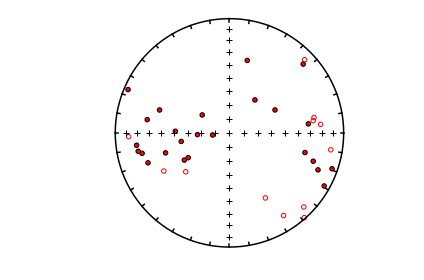

In [33]:
ipmag.plot_net(1)
ipmag.plot_di(dec=indata.transpose()[0],inc=indata.transpose()[1],color='red',edge='black')

The data are highly scattered and we hope that the geographic coordinate system looks better! To find out try: 

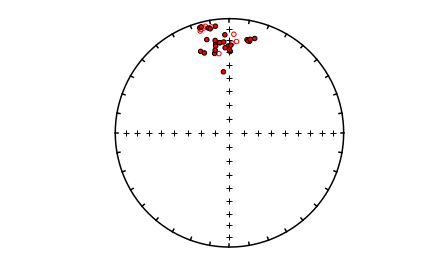

In [34]:
decs,incs=pmag.dogeo_V(indata)
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='red',edge='black')

These data are clearly much better grouped. 

And here they are printed out.

In [35]:
print(np.column_stack([decs,incs]))

[[ 1.23907966e+01  1.89735424e+01]
 [ 1.49830732e+01  1.55593373e+01]
 [ 1.06667819e+01  1.81693342e+01]
 [ 1.14047553e+01  1.89951632e+01]
 [ 1.24483163e+01  1.72036203e+01]
 [ 3.57299071e+02  1.51561580e+01]
 [ 3.53883281e+02  2.17091208e+01]
 [ 3.53789196e+02  2.16365727e+01]
 [ 3.40503777e+02  2.52889275e+01]
 [ 3.42563974e+02  2.75374519e+01]
 [ 3.51164668e+02  2.23293805e+01]
 [ 3.49415385e+02  2.99754627e+01]
 [ 3.46335983e+02  1.71006907e+01]
 [ 3.50937970e+02  2.40567015e+01]
 [ 3.59146910e+02  2.49558990e+01]
 [ 5.20812064e-01  2.94481211e+01]
 [ 3.54368265e+02  4.53644133e+01]
 [ 9.11626301e-01  2.42403293e+01]
 [ 3.50170459e+02  2.74704564e+01]
 [ 3.54249362e-02  2.81645605e+01]
 [ 3.43981389e+02 -8.04836591e+00]
 [ 3.46130907e+02 -6.14959601e+00]
 [ 3.47283278e+02 -4.83219850e+00]
 [ 3.50443170e+02 -6.65953274e+00]
 [ 3.44495997e+02 -6.69629260e+00]
 [ 3.52433892e+02 -3.06972914e+01]
 [ 1.55709734e+00 -2.25743459e+01]
 [ 4.40491709e+00 -2.08767482e+01]
 [ 2.54671945e+00 -1

## di_rot 

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#di_rot.py)


**di_rot**   rotates dec inc pairs to a new origin.  We can call **pmag.dodirot()** for single [dec,inc,Dbar,Ibar] data or **pmag.dodirot_V()** for an array of Dec, Inc pairs.  We can use the data from the [di_geo](#di_geo) example and rotate the geographic coordinate data such that the center of the distribution is the principal direction.   

We do it like this: 
- read in a data set with dec inc pairs
- make an equal area projection of the data to remind us what they look like
- calculate the principal component with **pmag.doprinc())**
- rotate the data to the principal direction
- plot the rotated data in an equal area projection. 

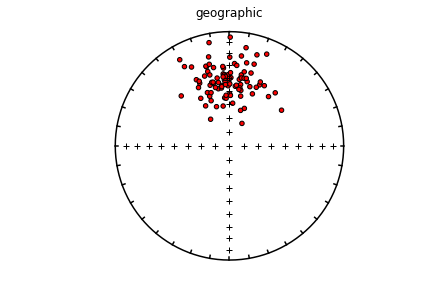

In [36]:
di_block=np.loadtxt('data_files/di_rot/di_rot_example.txt') # read in some data
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=di_block,title='geographic',color='red',edge='black')

Now we calculate the principal direction using the method described inthe [goprinc](#goprinc) section.

In [37]:
princ=pmag.doprinc(di_block)

And note we use **pmag.dodirot_V** to do the rotation.  

In [38]:
help(pmag.dodirot_V)

Help on function dodirot_V in module pmagpy.pmag:

dodirot_V(di_block, Dbar, Ibar)
    Rotate an array of dec/inc pairs to coordinate system with Dec,Inc as 0,90
    
    Parameters
    ___________________
    di_block : array of [[Dec1,Inc1],[Dec2,Inc2],....]
    Dbar : declination of desired center
    Ibar : inclination of desired center
    
    Returns
    __________
    array of rotated decs and incs: [[rot_Dec1,rot_Inc1],[rot_Dec2,rot_Inc2],....]



In [39]:
rot_block=pmag.dodirot_V(di_block,princ['dec'],princ['inc'])
rot_block

array([[354.75645822,  85.48653154],
       [  7.99632503,  76.34238986],
       [218.59309456,  71.32523704],
       [256.72254094,  81.2757586 ],
       [ 36.92916127,  71.27696636],
       [107.0627481 ,  74.65934147],
       [149.72796903,  84.48123415],
       [ 98.10291566,  69.6463126 ],
       [348.29161295,  72.10250018],
       [285.08151847,  74.70297918],
       [273.35642946,  68.89864852],
       [330.28910824,  88.29039388],
       [280.73571259,  70.61791032],
       [  3.71124387,  76.1147856 ],
       [ 42.78313341,  81.09119604],
       [264.92037462,  82.36734047],
       [228.29288415,  88.01160809],
       [ 55.75081265,  80.3717505 ],
       [ 43.32707637,  84.27753112],
       [271.79063108,  77.21159274],
       [104.84899776,  83.08877923],
       [139.82061837,  76.3993491 ],
       [228.41478454,  68.21812033],
       [184.94964644,  85.8780573 ],
       [290.12100275,  80.82170974],
       [164.81453236,  80.16691249],
       [ 40.09107584,  66.25110527],
 

And of course look at what we have done!

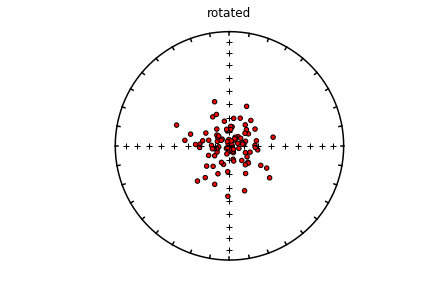

In [40]:
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=rot_block,color='red',title='rotated',edge='black')

## di_tilt

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) [\[Changing coordinate systems\]](http://earthref.org/MAGIC/books/Tauxe/Essentials/WebBook3ap1.html#Changing_coordinate_systems)
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#di_tilt.py)

**di_tilt** can rotate a direction of Declination = 5.3 and Inclination = 71.6 to “stratigraphic” coordinates, assuming the  strike was 135 and the dip was 21. The convention in this program is to use the dip direction, which is to the “right” of this strike. 

We can perform this calculation by calling  **pmag.dotilt** or **pmag.dotilt_V()** depending on if we have a single point or an array to rotate.

In [41]:
help(pmag.dotilt)

Help on function dotilt in module pmagpy.pmag:

dotilt(dec, inc, bed_az, bed_dip)
    Does a tilt correction on a direction (dec,inc) using bedding dip direction
    and bedding dip.
    
    Parameters
    ----------
    dec : declination directions in degrees
    inc : inclination direction in degrees
    bed_az : bedding dip direction
    bed_dip : bedding dip
    
    Returns
    -------
    dec,inc : a tuple of rotated dec, inc values
    
    Examples
    -------
    >>> pmag.dotilt(91.2,43.1,90.0,20.0)
    (90.952568837153436, 23.103411670066617)



In [42]:
help(pmag.dotilt_V)

Help on function dotilt_V in module pmagpy.pmag:

dotilt_V(indat)
    Does a tilt correction on an array with rows of dec,inc bedding dip direction and dip.
    
    Parameters
    ----------
    input : declination, inclination, bedding dip direction and bedding dip
    nested array of [[dec1, inc1, bed_az1, bed_dip1],[dec2,inc2,bed_az2,bed_dip2]...]
    
    Returns
    -------
    dec,inc : arrays of rotated declination, inclination



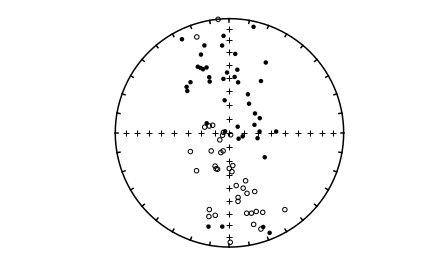

In [43]:
# read in some data
data=np.loadtxt('data_files/di_tilt/di_tilt_example.dat') # load up the data
di_block=data[:,[0,1]] # let's look at the data first! 
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)

Now we can rotate them

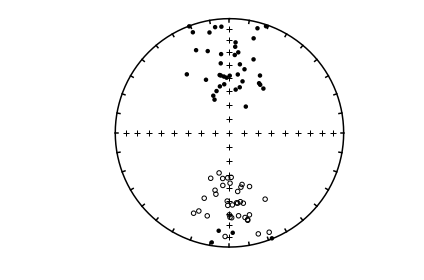

In [44]:
Dt,It=pmag.dotilt_V(data) # rotate them
ipmag.plot_net(1) # and take another look
ipmag.plot_di(dec=Dt,inc=It)

Use the handy function **np.column_stack** to pair the decs and incs together

In [45]:
np.column_stack((Dt,It)) # if you want to see the output: 

array([[ 3.74524673e+01,  4.95794971e+01],
       [ 3.36467520e+02,  6.09447203e+01],
       [ 3.38016562e+02,  2.29922937e+01],
       [ 3.55656248e+02,  7.51556739e+00],
       [ 8.17695697e+00,  5.86079487e+01],
       [ 6.24312543e+00,  2.98149642e+01],
       [ 3.57033733e+02,  5.00073921e+01],
       [ 3.42811107e+02,  5.85702274e+01],
       [ 3.39284414e+02,  3.48942163e-01],
       [ 3.85757431e+00,  2.17049062e+01],
       [ 3.54347623e+02,  4.89864710e+01],
       [ 2.83925013e-01,  4.85556186e+01],
       [ 3.35776430e+02,  6.39503873e+01],
       [ 1.81481921e+01,  3.27972491e+01],
       [ 3.53945383e+02,  3.12870301e+01],
       [ 3.08201120e+01,  4.80808730e+01],
       [ 2.80340193e+01,  4.25855265e+01],
       [ 3.52849360e+02,  3.85903328e+01],
       [ 3.51431548e+02,  4.79200709e+01],
       [ 1.49895755e+01,  5.82971278e+00],
       [ 2.01405693e+02, -2.73644346e+01],
       [ 1.94529222e+02, -6.03000930e+01],
       [ 1.51711653e+02, -3.44278588e+01],
       [ 2.

## di_vgp

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#di_vgp.py)


**di_vgp** converts directions (declination,inclination) to Virtual Geomagnetic Pole positions.   This is the inverse of [**vgp_di**](#vgp_di). 
To do so, we will call **pmag.dia_vgp()** from within the notebook.

In [46]:
help(pmag.dia_vgp)

Help on function dia_vgp in module pmagpy.pmag:

dia_vgp(*args)
    Converts directional data (declination, inclination, alpha95) at a given
    location (Site latitude, Site longitude) to pole position (pole longitude,
    pole latitude, dp, dm)
    
    Parameters
    ----------
    Takes input as (Dec, Inc, a95, Site latitude, Site longitude)
    Input can be as individual values (5 parameters)
    or
    as a list of lists: [[Dec, Inc, a95, lat, lon],[Dec, Inc, a95, lat, lon]]
    
    Returns
    ----------
    if input is individual values for one pole the return is:
    pole longitude, pole latitude, dp, dm
    
    if input is list of lists the return is:
    list of pole longitudes, list of pole latitude, list of dp, list of dm



In [47]:
data=np.loadtxt('data_files/di_vgp/di_vgp_example.dat') # read in some data
print (data)

[[ 11.   63.   55.   13. ]
 [154.  -58.   45.5 -73. ]]


The data are almost in the correct format, but there is no a95 field, so that will have to be inserted (as zeros). 

In [48]:
a95=np.zeros(len(data))
a95

array([0., 0.])

In [49]:
DIs=data.transpose()[0:2].transpose() # get the DIs
LatLons=data.transpose()[2:].transpose() # get the Lat Lons
newdata=np.column_stack((DIs,a95,LatLons)) # stitch them back together
print (newdata)

[[ 11.   63.    0.   55.   13. ]
 [154.  -58.    0.   45.5 -73. ]]


In [50]:
vgps=np.array(pmag.dia_vgp(newdata)) # get a tuple with lat,lon,dp,dm, convert to array
print (vgps.transpose()) #  print out the vgps

[[154.65869784  77.3180885    0.           0.        ]
 [  6.62978666 -69.63701906   0.           0.        ]]


## dipole_pinc

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#dipole_pinc.py)

If we assume a geocentric axial dipole, we can calculate an expected inclination at a given latitude and that is what **dipole_pinc** does.   It calls **pmag.pinc()** and so will we to find the expected inclination at a paleolatitude of 24$^{\circ}$S! 


In [51]:
help(pmag.pinc)

Help on function pinc in module pmagpy.pmag:

pinc(lat)
    calculate paleoinclination from latitude using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    lat : either a single value or an array of latitudes
    
    Returns
    -------
    
    array of inclinations



In [52]:
lat=-24
pmag.pinc(-24)

-41.68370203503222

Or as an array

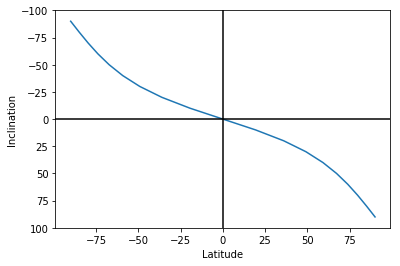

In [53]:
lats=range(-90,100,10)
incs=pmag.pinc(lats)
plt.plot(incs,lats)
plt.ylim(100,-100)
plt.xlabel('Latitude')
plt.ylabel('Inclination')
plt.axhline(0,color='black')
plt.axvline(0,color='black');

## dipole_plat

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#dipole_plat.py)

**dipole_plat** is similar to [dipole_pinc](#dipole_pinc) but calculates the paleolatitude from the inclination.  We will call **pmag.plat()**:

In [54]:
help(pmag.plat)

Help on function plat in module pmagpy.pmag:

plat(inc)
    calculate paleolatitude from inclination using dipole formula: tan(I) = 2tan(lat)
    Parameters
    ________________
    
    inc : either a single value or an array of inclinations
    
    Returns
    -------
    
    array of latitudes



In [55]:
inc=42
pmag.plat(inc)

24.237370383549177

## dir_cart

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#dir_cart.py)

**pmag.dir2cart()** converts directions (Declination, Inclination, Intensity) to cartesian coordinates (X,Y,Z). 

In [56]:
help(pmag.dir2cart)

Help on function dir2cart in module pmagpy.pmag:

dir2cart(d)
    Converts a list or array of vector directions in degrees (declination,
    inclination) to an array of the direction in cartesian coordinates (x,y,z)
    
    Parameters
    ----------
    d : list or array of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    cart : array of [x,y,z]
    
    Examples
    --------
    >>> pmag.dir2cart([200,40,1])
    array([-0.71984631, -0.26200263,  0.64278761])



In [57]:
# read in data file from example file
dirs=np.loadtxt('data_files/dir_cart/dir_cart_example.dat')
print ('Input: \n',dirs) # print out the cartesian coordinates
# print out the  results
carts = pmag.dir2cart(dirs)
print ("Output: ")
for c in carts:
    print ('%8.4e %8.4e %8.4e'%(c[0],c[1],c[2]))

Input: 
 [[ 20.   46.    1.3]
 [175.  -24.    4.2]]
Output: 
8.4859e-01 3.0886e-01 9.3514e-01
-3.8223e+00 3.3441e-01 -1.7083e+00


## eigs_s

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#eigs_s.py)

This program converts eigenparameters to the six tensor elements.  This is the inverse of [s_eigs](#s_eigs).
There is a function **ipmag.eigs_s()** which will do this in a notebook:

In [58]:
help(ipmag.eigs_s)

Help on function eigs_s in module pmagpy.ipmag:

eigs_s(infile='', dir_path='.')
    Converts eigenparamters format data to s format
    
    Parameters
    ___________________
    Input:
        file : input file name with eigenvalues (tau) and eigenvectors (V) with  format:
            tau_1 V1_dec V1_inc tau_2 V2_dec V2_inc tau_3 V3_dec V3_inc
    Output
         the six tensor elements as a nested array
          [[x11,x22,x33,x12,x23,x13],....]



In [59]:
Ss=ipmag.eigs_s(infile="eigs_s_example.dat", dir_path='data_files/eigs_s')
for s in Ss:
    print (s)

[0.33416328, 0.33280227, 0.33303446, -0.00016631071, 0.0012316267, 0.0013552071]
[0.33555713, 0.33197427, 0.3324687, 0.00085685047, 0.00025266458, 0.0009815096]
[0.335853, 0.33140355, 0.3327435, 0.0013230764, 0.0011778723, 4.5534102e-06]
[0.3347939, 0.33140817, 0.33379796, -0.0004308845, 0.0004885784, 0.00045610438]
[0.33502916, 0.33117944, 0.3337915, -0.00106313, 0.00029828132, 0.00035882858]
[0.33407047, 0.3322691, 0.33366045, -6.384468e-06, 0.0009844461, 5.9963346e-05]
[0.33486328, 0.33215088, 0.3329859, -0.0003427944, 0.00038177703, 0.0002014497]
[0.33509853, 0.33195898, 0.33294258, 0.000769761, 0.00056717254, 0.00011960149]


## eq_di

[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#eq_di.py)

 Data are frequently published as equal area projections and not listed in data tables. These data can be digitized as x,y data (assuming the outer rim is unity) and converted to approximate directions with the program **eq_di**. To use this program, install a graph digitizer (GraphClick from http://www.arizona-software.ch/graphclick/ works on Macs).

Digitize the data from the equal area projection saved in the file eqarea.png in the eq_di directory. You should only work on one hemisphere at a time (upper or lower) and save each hemisphere in its own file. Then you can convert the X,Y data to approximate dec and inc data - the quality of the data depends on your care in digitizing and the quality of the figure that you are digitizing.

Here we will try this out on a datafile already prepared, which are the digitized data from the lower hemisphere of a plot.  You  check your work with [eqarea](#eqarea).  

To do this in a notebook, we can use **pmag.doeqdi()**.  

In [60]:
help(pmag.doeqdi)

Help on function doeqdi in module pmagpy.pmag:

doeqdi(x, y, UP=False)
    Takes digitized x,y, data and returns the dec,inc, assuming an
    equal area projection
    Parameters
    __________________
        x : array of digitized x from point on equal area projection
        y : array of  igitized y from point on equal area projection
        UP : if True, is an upper hemisphere projection
    Output :
        dec : declination
        inc : inclination



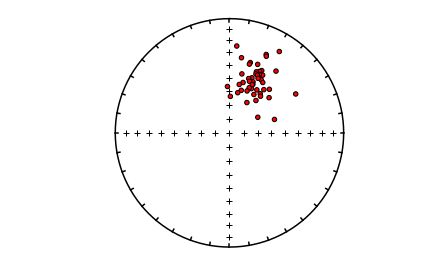

In [61]:
# read in the data into an array
# x is assumed first column, y, second
xy=np.loadtxt('data_files/eq_di/eq_di_example.dat').transpose()
decs,incs=pmag.doeqdi(xy[0],xy[1])
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='r',edge='black')

## fcalc

**pmag.fcalc()** returns the values of an F-test from  an F table.

In [62]:
help(pmag.fcalc)

Help on function fcalc in module pmagpy.pmag:

fcalc(col, row)
    looks up an F-test stastic from F tables F(col,row), where row is number of degrees of freedom - this is 95% confidence (p=0.05).
    
      Parameters
      _________
          col : degrees of freedom column
          row : degrees of freedom row
    
      Returns
          F : value for 95% confidence from the F-table



## fisher

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#fisher.py)

**fisher**  draws $N$  directions  from a Fisher distribution with specified $\kappa$ and a vertical mean. (For other directions see [fishrot](#fishrot)).  To do this, we can just call the function **pmag.fshdev()** $N$ times.

In [63]:
help(pmag.fshdev)

Help on function fshdev in module pmagpy.pmag:

fshdev(k)
    Generate a random draw from a Fisher distribution with mean declination
    of 0 and inclination of 90 with a specified kappa.
    
    Parameters
    ----------
    k : kappa (precision parameter) of the distribution
        k can be a single number or an array of values
    
    Returns
    ----------
    dec, inc : declination and inclination of random Fisher distribution draw
               if k is an array, dec, inc are returned as arrays, otherwise, single values



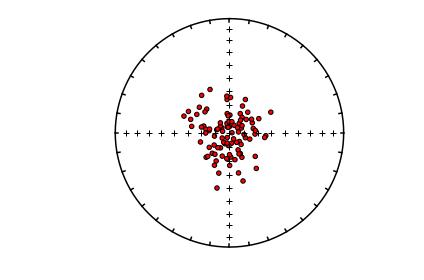

In [64]:
# set the number, N, and kappa
N,kappa=100,20
# a basket to put our fish in
fish=[]
# get the Fisherian deviates
for i in range(N):
    d,i=pmag.fshdev(kappa)
    fish.append([d,i])
ipmag.plot_net(1)
ipmag.plot_di(di_block=fish,color='r',edge='black')

## fishrot


[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#fishrot.py)

This program is similar to [fisher](#fisher), but allows you to specify the mean direction. 
This has been implemented as **ipmag.fishrot()**. 

In [65]:
help(ipmag.fishrot)

Help on function fishrot in module pmagpy.ipmag:

fishrot(k=20, n=100, dec=0, inc=90, di_block=True)
    Generates Fisher distributed unit vectors from a specified distribution
    using the pmag.py fshdev and dodirot functions.
    
    Parameters
    ----------
    k : kappa precision parameter (default is 20)
    n : number of vectors to determine (default is 100)
    dec : mean declination of distribution (default is 0)
    inc : mean inclination of distribution (default is 90)
    di_block : this function returns a nested list of [dec,inc,1.0] as the default
    if di_block = False it will return a list of dec and a list of inc
    
    Returns
    ---------
    di_block : a nested list of [dec,inc,1.0] (default)
    dec, inc : a list of dec and a list of inc (if di_block = False)
    
    Examples
    --------
    >>> ipmag.fishrot(k=20, n=5, dec=40, inc=60)
    [[44.766285502555775, 37.440866867657235, 1.0],
     [33.866315796883725, 64.732532250463436, 1.0],
     [47.0029127705

In [66]:
rotdi=ipmag.fishrot(k=50,n=5,dec=33,inc=41)
for di in rotdi:
    print ('%7.1f %7.1f'%(di[0],di[1]))

   11.9    29.3
   43.6    61.6
   33.5    43.2
   23.6    42.3
   41.7    35.5


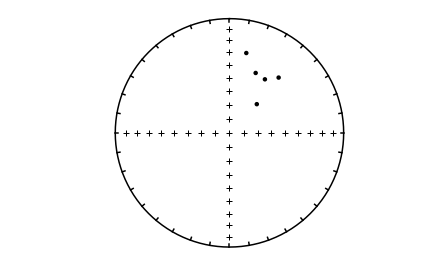

In [67]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=rotdi)

## flip

Fisher statistics requires unimodal data (all in one direction with no reversals) but many paleomagnetic data sets are bimodal.  To flip bimodal data into a single mode, we can use **pmag.flip( )**.  This function calculates the principle direction and flips all the 'reverse' data to the 'normal' direction along the principle axis.  

In [68]:
help(pmag.flip)

Help on function flip in module pmagpy.pmag:

flip(di_block, combine=False)
    determines 'normal' direction along the principle eigenvector, then flips the antipodes of
    the reverse mode to the antipode
    
    Parameters
    ___________
    di_block : nested list of directions
    Return
    D1 : normal mode
    D2 : flipped reverse mode as two DI blocks
    combine : if True return combined D1, D2, nested D,I pairs



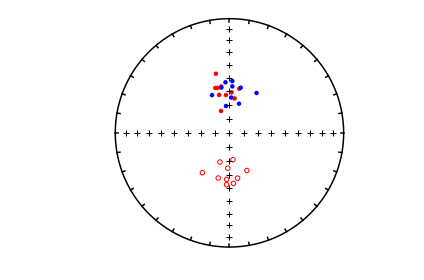

In [69]:
#read in the data into an array
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
# flip the reverse directions to their normal antipodes
normal,flipped=pmag.flip(di_block)
# and plot them up
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red')
ipmag.plot_di(di_block=flipped,color='b')

## gaussian

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#gaussian.py)

This program generates sets of data drawn from a normal distribution with a given mean and standard deviation.  It is just a wrapper for a call to  **pmag.gaussdev()** which just calls **numpy.random.normal()** which we could do, but we would have to import it, so it is easiest just to call the **pmag** version which we have already imported.  

In [70]:
help(pmag.gaussdev)

Help on function gaussdev in module pmagpy.pmag:

gaussdev(mean, sigma, N=1)
        returns a number randomly drawn from a gaussian distribution with the given mean, sigma
        Parmeters:
        _____________________________
        mean : mean of the gaussian distribution from which to draw deviates
        sigma : standard deviation of same
        N : number of deviates desired
    
        Returns
        -------
    
        N deviates from the normal distribution from
    .



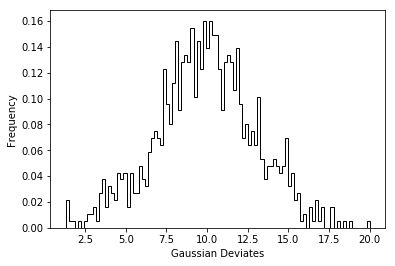

In [71]:
N=1000
bins=100
norm=pmag.gaussdev(10,3,N)
plt.hist(norm,bins=bins,color='black',histtype='step',density=True)
plt.xlabel('Gaussian Deviates')
plt.ylabel('Frequency');

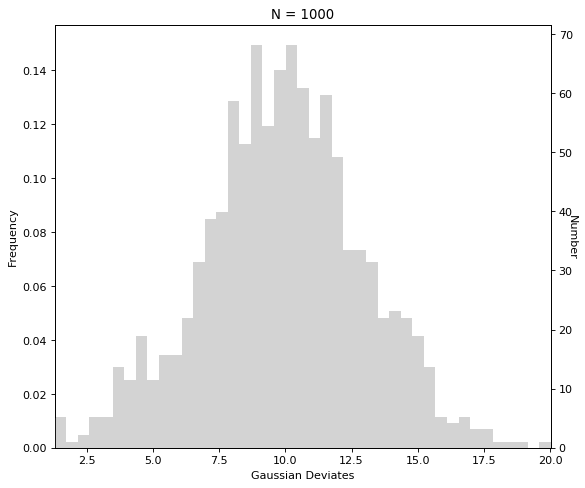

In [72]:
# alternatively we can plot with ipmag.histplot:
ipmag.histplot(data=norm, xlab='Gaussian Deviates', save_plots=False, norm=-1)

## gobing

 
[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#gobing.py)

**gobing** calculates Bingham statistics for sets of directional data (see the section for eqarea_ell in the PmagPy_plots_analysis documentation for nice examples).  We do this by calling **pmag.dobingham()**.

In [73]:
help(pmag.dobingham)

Help on function dobingham in module pmagpy.pmag:

dobingham(di_block)
    Calculates the Bingham mean and associated statistical parameters from
    directions that are input as a di_block
    
    Parameters
    ----------
    di_block : a nested list of [dec,inc] or [dec,inc,intensity]
    
    Returns
    -------
    bpars : dictionary containing the Bingham mean and associated statistics
    dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [74]:
di_block=np.loadtxt('data_files/gobing/gobing_example.txt')
pmag.dobingham(di_block)


{'dec': 357.77952733337463,
 'inc': 60.3168380083183,
 'Edec': 105.71735145158095,
 'Einc': 9.956900268236785,
 'Zdec': 20.99389065755772,
 'Zinc': -27.647853556651516,
 'n': 20,
 'Zeta': 4.480026907803641,
 'Eta': 4.4907543191720025}

## gofish

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#gofish.py)

**gofish** calculates Fisher statistics for sets of directional data.  (see the section for eqarea_ell in the PmagPy_plots_analysis documentation for nice examples).
This can be done with **ipmag.fisher_mean()**.

In [75]:
help(ipmag.fisher_mean)

Help on function fisher_mean in module pmagpy.ipmag:

fisher_mean(dec=None, inc=None, di_block=None)
    Calculates the Fisher mean and associated parameters from either a list of
    declination values and a separate list of inclination values or from a
    di_block (a nested list a nested list of [dec,inc,1.0]). Returns a
    dictionary with the Fisher mean and statistical parameters.
    
    Parameters
    ----------
    dec : list of declinations or longitudes
    inc : list of inclinations or latitudes
    di_block : a nested list of [dec,inc,1.0]
        A di_block can be provided instead of dec, inc lists in which case it
        will be used. Either dec, inc lists or a di_block need to be provided.
    
    Returns
    -------
    fisher_mean : dictionary containing the Fisher mean parameters
    
    Examples
    --------
    Use lists of declination and inclination to calculate a Fisher mean:
    
    >>> ipmag.fisher_mean(dec=[140,127,142,136],inc=[21,23,19,22])
    {'alpha

In [76]:
di_block=np.loadtxt('data_files/gofish/fishrot.out')
ipmag.fisher_mean(di_block=di_block)

{'dec': 10.783552984917437,
 'inc': 39.602582993520244,
 'n': 10,
 'r': 9.848433230859508,
 'k': 59.379770717798884,
 'alpha95': 6.320446730051139,
 'csd': 10.511525802823254}

### fisher mean on pandas DataFrames
There is also a function **pmag.dir_df_fisher_mean()** that calculates Fisher statistics on a Pandas DataFrame with directional data

In [77]:
help(pmag.dir_df_fisher_mean)

Help on function dir_df_fisher_mean in module pmagpy.pmag:

dir_df_fisher_mean(dir_df)
    calculates fisher mean for Pandas data frame
    
    Parameters
    __________
    dir_df: pandas data frame with columns:
        dir_dec : declination
        dir_inc : inclination
    Returns
    -------
    fpars : dictionary containing the Fisher mean and statistics
        dec : mean declination
        inc : mean inclination
        r : resultant vector length
        n : number of data points
        k : Fisher k value
        csd : Fisher circular standard deviation
        alpha95 : Fisher circle of 95% confidence



In [78]:
# make the data frame
dir_df=pd.read_csv('data_files/gofish/fishrot.out',delim_whitespace=True, header=None)
dir_df.columns=['dir_dec','dir_inc']
pmag.dir_df_fisher_mean(dir_df)

{'dec': 10.78355298491744,
 'inc': 39.60258299352024,
 'n': 10,
 'r': 9.848433230859508,
 'k': 59.379770717798884,
 'alpha95': 6.320446730051139,
 'csd': 10.511525802823254}

## gokent

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#gokent.py)

With **gokent** we can calculate Kent statistics on sets of directional data (see the section for eqarea_ell in the PmagPy_plots_analysis documentation for nice examples).  

This calls **pmag.dokent()** (see also **eqarea_ell** example)

In [79]:
help(pmag.dokent)

Help on function dokent in module pmagpy.pmag:

dokent(data, NN)
    gets Kent  parameters for data
    Parameters
    ___________________
    data :  nested pairs of [Dec,Inc]
    NN  : normalization
        NN is the number of data for Kent ellipse
        NN is 1 for Kent ellipses of bootstrapped mean directions
    
    Return
    kpars dictionary keys
        dec : mean declination
        inc : mean inclination
        n : number of datapoints
        Eta : major ellipse
        Edec : declination of major ellipse axis
        Einc : inclination of major ellipse axis
        Zeta : minor ellipse
        Zdec : declination of minor ellipse axis
        Zinc : inclination of minor ellipse axis



In [80]:
di_block=np.loadtxt('data_files/gokent/gokent_example.txt')
pmag.dokent(di_block,di_block.shape[0])

{'dec': 359.1530456710398,
 'inc': 55.03341554254794,
 'n': 20,
 'Zdec': 246.82080930796928,
 'Zinc': 14.881429411175574,
 'Edec': 147.69921287231705,
 'Einc': 30.819395154843157,
 'Zeta': 7.805151237185049,
 'Eta': 9.304659303299626}

## goprinc

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#goprinc.py)

**goprinc** calculates the principal directions (and their eigenvalues) for sets of paleomagnetic vectors.  It doesn't do any statistics on them, unlike the other programs. 
We will call **pmag.doprinc()**:

In [81]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components
        dec : principal directiion declination
        inc : principal direction inclination
        V2dec : intermediate eigenvector declination
        V2inc : intermediate eigenvector inclination
        V3dec : minor eigenvector declination
        V3inc : minor eigenvector inclination
        tau1 : major eigenvalue
        tau2 : intermediate eigenvalue
        tau3 : minor eigenvalue
        N  : number of points
        Edir : elongation direction [dec, inc, length]



In [82]:
di_block=np.loadtxt('data_files/goprinc/goprinc_example.txt')
pmag.doprinc(di_block)

{'Edir': array([151.85261736,  29.07891169,   1.        ]),
 'dec': 3.869443846664467,
 'inc': 56.740159941913355,
 'N': 20,
 'tau1': 0.8778314142896239,
 'tau2': 0.07124540042876253,
 'tau3': 0.05092318528161358,
 'V2dec': 151.85261735984162,
 'V2inc': 29.078911691227447,
 'V3dec': 250.25426093396385,
 'V3inc': 14.721055437689328}

## igrf

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#igrf.py)


This program gives geomagnetic field vector data for a specified place at a specified time.  It has many built in models including  IGRFs, GUFM and several archeomagnetic models.   It calls the  function **ipmag.igrf()** for this so that is what we will do.  

In [83]:
help(ipmag.igrf)

Help on function igrf in module pmagpy.ipmag:

igrf(input_list, mod='', ghfile='')
    Determine Declination, Inclination and Intensity from the IGRF model.
    (http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html)
    
    Parameters
    ----------
    input_list : list with format [Date, Altitude, Latitude, Longitude]
        date must be in decimal year format XXXX.XXXX (Common Era)
    mod :  desired model
        "" : Use the IGRF
        custom : use values supplied in ghfile
        or choose from this list
        ['arch3k','cals3k','pfm9k','hfm10k','cals10k.2','cals10k.1b']
        where:
            arch3k (Korte et al., 2009)
            cals3k (Korte and Constable, 2011)
            cals10k.1b (Korte et al., 2011)
            pfm9k  (Nilsson et al., 2014)
            hfm10k is the hfm.OL1.A1 of Constable et al. (2016)
            cals10k.2 (Constable et al., 2016)
            the first four of these models, are constrained to agree
            with gufm1 (Jackson et al., 2000) for

We will calculate the field for San Diego from 3000 BCE to 1950 in 50 year increments using the hfm.OL1.A1 model of Constable et al. (2016, doi: 10.1016/j.epsl.2016.08.015).  

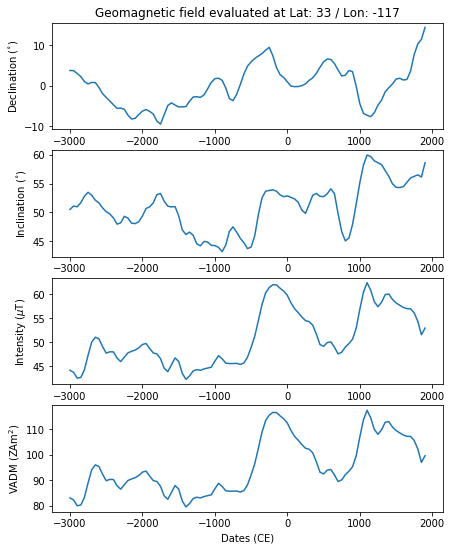

In [84]:
# make a list of desired dates
dates=range(-3000,1950,50) # list of dates in +/- Common Era
mod = 'hfm10k' # choose the desired model
lat,lon,alt=33,-117,0 # desired latitude, longitude and alitude
Vecs=[] # list for Dec,Inc,Int outputs
for date in dates: # step through the dates
    Vecs.append(ipmag.igrf([date,alt,lat,lon],mod=mod)) # append to list
vector_df = pd.DataFrame(Vecs)   # make it into a Pandas dataframe
vector_df.columns=['dec','inc','int']
vector_df['vadms']=pmag.b_vdm(vector_df.int.values*1e-9, lat) # calculate the VADMs
vector_df['dec_adj']=vector_df['dec'] 
vector_df.loc[vector_df.dec>180,['dec_adj']]=vector_df.dec-360 # adjust declinations to be -180 => 180
fig=plt.figure(1,figsize=(7,9)) # set up the figure
fig.add_subplot(411) # make 4 rows of plots, this is the first
plt.plot(dates,vector_df.dec_adj) # plot the adjusted declinations
plt.ylabel('Declination ($^{\circ}$)')
plt.title('Geomagnetic field evaluated at Lat: '+str(lat)+' / Lon: '+str(lon))
fig.add_subplot(412) # this is the second
plt.plot(dates,vector_df.inc) # plot  the inclinations
plt.ylabel('Inclination ($^{\circ}$)')
fig.add_subplot(413)
plt.plot(dates,vector_df.int*1e-3) # plot the intensites (in uT instead of nT)
plt.ylabel('Intensity ($\mu$T)')
fig.add_subplot(414) # plot the VADMs 
plt.plot(dates,vector_df.vadms*1e-21) # plot as ZAm^2
plt.ylabel('VADM (ZAm$^2$)')
plt.xlabel('Dates (CE)');

## incfish

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#incfish.py)

You can't get a meaningful average inclination from inclination only data because of the exponential relationship between inclinations and the true mean inclination for Fisher distributions (except exactly at the pole and the equator).  So, McFadden and Reid (1982, doi:  10.1111/j.1365-246X.1982.tb04950.x) developed a maximum liklihood estimate for getting an estimate for true mean absent declination.   **pmag.doincfish()** is an implementation of that concept. 

In [85]:
help(pmag.doincfish)

Help on function doincfish in module pmagpy.pmag:

doincfish(inc)
    gets fisher mean inc from inc only data
    input: list of inclination values
    output: dictionary of
        'n' : number of inclination values supplied
        'ginc' : gaussian mean of inclinations
        'inc' : estimated Fisher mean
        'r' : estimated Fisher R value
        'k' : estimated Fisher kappa
        'alpha95' : estimated fisher alpha_95
        'csd' : estimated circular standard deviation



In [86]:
incs=np.loadtxt('data_files/incfish/incfish_example_inc.dat')
pmag.doincfish(incs)

{'n': 100,
 'ginc': 57.135000000000005,
 'inc': 61.024999999999764,
 'r': 92.8908144677846,
 'k': 13.925645849497057,
 'alpha95': 0.9966295962964244,
 'csd': 21.70587740469687}

## pca

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#pca.py)

**pca**  calculates best-fit lines, planes or Fisher means through selected treatment steps along with Kirschvink (1980, doi:  10.1111/j.1365-246X.1980.tb02601.x) MAD values. The file format is a simple space delimited file with specimen name, treatment step, intensity, declination and inclination. **pca.py**  calls **pmag.domean()**, so that is what we will do here. 

In [87]:
help(pmag.domean)

Help on function domean in module pmagpy.pmag:

domean(data, start, end, calculation_type)
    Gets average direction using Fisher or principal component analysis (line
    or plane) methods
    
    Parameters
    ----------
    data : nest list of data: [[treatment,dec,inc,int,quality],...]
    start : step being used as start of fit (often temperature minimum)
    end : step being used as end of fit (often temperature maximum)
    calculation_type : string describing type of calculation to be made
    'DE-BFL' (line), 'DE-BFL-A' (line-anchored), 'DE-BFL-O' (line-with-origin),
    'DE-BFP' (plane), 'DE-FM' (Fisher mean)
    
    Returns
    -------
    mpars : dictionary with the keys "specimen_n","measurement_step_min",
    "measurement_step_max","specimen_mad","specimen_dec","specimen_inc"



In [88]:
# read in data as space delimited file
data=pd.read_csv('data_files/pca/pca_example.txt',\
                 delim_whitespace=True,header=None)
# we need to add a column for quality
data['quality']='g'
# strip off the specimen name and reorder records 
#  from:  int,dec,inc to: dec,inc,int 
data=data[[1,3,4,2,'quality']].values.tolist()
pmag.domean(data,1,10,'DE-BFL')

{'calculation_type': 'DE-BFL',
 'center_of_mass': [1.9347888195464598e-05,
  -2.1736620227095438e-05,
  2.5042313896882542e-05],
 'specimen_direction_type': 'l',
 'specimen_dec': 334.9058336155927,
 'specimen_inc': 51.50973235790523,
 'specimen_mad': 8.75370050160012,
 'specimen_n': 10,
 'specimen_dang': 19.257783100769142,
 'measurement_step_min': 2.5,
 'measurement_step_max': 70.0}

## pt_rot


[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html) 
[\[Essentials Appendix A.3.5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap1.html)
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#pt_rot.py)



This program finds rotation poles  for a specified location, age and destination plate, then rotates the point into the destination plate coordinates using the roations and methods described in Essentials Appendix A.3.5.  
This can be done for you using the function **frp.get_pole()** in the finite rotation pole module called **pmagpy.frp**. You then call **pmag.pt_rot()** to do the rotation.  Let's do this for to rotate the Cretaceous poles from Europe (sane data as in the polemap_magic example) and rotate them to South African coordinates.  


In [89]:
# need to load this special module
import pmagpy.frp as frp
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [90]:
Prot=frp.get_pole('eur',100)
Prot

[40.2, -12.5, 28.5]

In [91]:
help(pmag.pt_rot)

Help on function pt_rot in module pmagpy.pmag:

pt_rot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



In [92]:
data=pd.read_csv('data_files/polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
RLats,RLons=rot_pts=pmag.pt_rot(Prot,lats,lons)

And now we can plot them using **pmagplotlib.plot_map()**

gridlines only supported for PlateCarree, Lambert Conformal, and Mercator plots currently


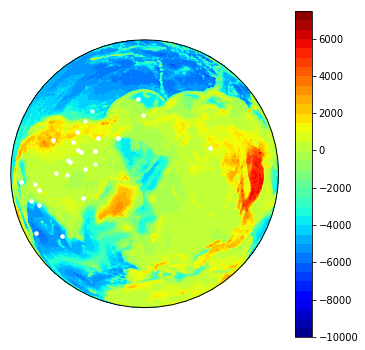

In [93]:
Opts={}
Opts['sym']='wo' # sets the symbol
Opts['symsize']=10
Opts['proj']='ortho'
Opts['edge']='black'
Opts['lat_0']=90
Opts['details']={}
Opts['details']['fancy']=True # warning : this option takes a few minutes
if has_cartopy:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plot_map(1, RLats, RLons, Opts)
elif has_basemap:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plot_map_basemap(1, RLats, RLons, Opts)

## s_eigs


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#s_eigs.py)

This program converts  the six tensor elements to eigenparameters - the inverse of [eigs_s](#eigs_s).  
We can call the function **pmag.doseigs()** from the notebook.  


In [94]:
help(pmag.doseigs)

Help on function doseigs in module pmagpy.pmag:

doseigs(s)
    convert s format for eigenvalues and eigenvectors
    
    Parameters
    __________
    s=[x11,x22,x33,x12,x23,x13] : the six tensor elements
    
    Return
    __________
        tau : [t1,t2,t3]
           tau is an list of eigenvalues in decreasing order:
        V : [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
            is an list of the eigenvector directions



In [95]:
Ss=np.loadtxt('data_files/s_eigs/s_eigs_example.dat')
for s in Ss:
    tau,V=pmag.doseigs(s)
    print ('%f %8.2f %8.2f %f %8.2f %8.2f %f %8.2f %8.2f'%\
           (tau[2],V[2][0],V[2][1],tau[1],V[1][0],V[1][1],tau[0],V[0][0],V[0][1]))

0.331272   239.53    44.70 0.333513   126.62    21.47 0.335215    19.03    37.54
0.331779   281.12     6.18 0.332183   169.79    73.43 0.336039    12.82    15.32
0.330470   283.57    27.30 0.333283   118.37    61.91 0.336247    16.75     6.13
0.331238   261.36    12.07 0.333776   141.40    66.82 0.334986   355.70    19.48
0.330857   255.71     7.13 0.333792   130.85    77.65 0.335352   346.97    10.03
0.331759   268.51    26.79 0.334050   169.66    16.95 0.334190    51.04    57.53
0.331950   261.59    20.68 0.333133    92.18    68.99 0.334917   352.93     3.54
0.331576   281.42    21.32 0.333121   117.04    67.94 0.335303    13.54     5.41


## s_geo

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#s_geo.py)

**s_geo** takes the 6 tensor elements in specimen coordinates and applies the rotation similar to [**di_geo**](#di_geo).  To do this we will call **pmag.dosgeo()** from within the notebook.   


In [96]:
help(pmag.dosgeo)

Help on function dosgeo in module pmagpy.pmag:

dosgeo(s, az, pl)
    rotates  matrix a to az,pl returns  s
    Parameters
    __________
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    az : the azimuth of the specimen X direction
    pl : the plunge (inclination) of the specimen X direction
    
    Return
    s_rot : [x11,x22,x33,x12,x23,x13] - after rotation



In [97]:
Ss=np.loadtxt('data_files/s_geo/s_geo_example.dat')
for s in Ss:
    print(pmag.dosgeo(s[0:6],s[6],s[7]))

[ 3.3412680e-01  3.3282733e-01  3.3304587e-01 -1.5288725e-04
  1.2484333e-03  1.3572115e-03]
[3.3556300e-01 3.3198264e-01 3.3245432e-01 8.7258930e-04 2.4140846e-04
 9.6166186e-04]
[3.3584908e-01 3.3140627e-01 3.3274469e-01 1.3184461e-03 1.1881561e-03
 2.9863901e-05]
[ 0.33479756  0.3314253   0.3337772  -0.00047493  0.00049539  0.00044303]
[ 3.3505613e-01  3.3114848e-01  3.3379540e-01 -1.0137478e-03
  2.8535718e-04  3.4851654e-04]
[ 3.3406156e-01  3.3226916e-01  3.3366925e-01 -2.2665596e-05
  9.8547747e-04  5.5531069e-05]
[ 3.3486596e-01  3.3216032e-01  3.3297369e-01 -3.5492037e-04
  3.9253550e-04  1.5402706e-04]
[3.3510646e-01 3.3196402e-01 3.3292958e-01 7.5965287e-04 5.7242444e-04
 1.0112141e-04]


## s_hext

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#s_hext.py)

**s_hext** calculates Hext (1963, doi: 10.2307/2333905) statistics for anisotropy data in the six tensor element format.  
It  calls **pmag.dohext()**.   

In [98]:
help(pmag.dohext)

Help on function dohext in module pmagpy.pmag:

dohext(nf, sigma, s)
    calculates hext parameters for nf, sigma and s
    
    Parameters
    __________
    nf :  number of degrees of freedom (measurements - 6)
    sigma : the sigma of the measurements
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    
    Return
    hpars : dictionary of Hext statistics with keys:
        'F_crit' : critical value for anisotropy
        'F12_crit' : critical value for tau1>tau2, tau2>3
        'F' : value of F
        'F12' : value of F12
        'F23' : value of F23
        'v1_dec': declination of principal eigenvector
        'v1_inc': inclination of principal eigenvector
        'v2_dec': declination of major eigenvector
        'v2_inc': inclination of major eigenvector
        'v3_dec': declination of minor eigenvector
        'v3_inc': inclination of minor eigenvector
        't1': principal eigenvalue
        't2': major eigenvalue
        't3': minor eigenvalue
        'e12': 

We are working with data that have no sigmas attached to them and want to average all the values in the file together.  Let's look at the rotated data from the [**s_geo**](#s_geo) example.  

In [99]:
# read in the data
Ss=np.loadtxt('data_files/s_geo/s_geo_example.dat')
# make a container for the rotated S values
SGeos=[]
for s in Ss:
    SGeos.append(pmag.dosgeo(s[0:6],s[6],s[7]))
nf,sigma,avs=pmag.sbar(SGeos)  # get the average over all the data
hpars=pmag.dohext(nf,sigma,avs)
print(hpars)

{'F_crit': '2.4377', 'F12_crit': '3.2199', 'F': 5.752167064666719, 'F12': 3.5510601243464004, 'F23': 3.663557566868797, 'v1_dec': 5.330894345303252, 'v1_inc': 14.682483596068828, 'v2_dec': 124.47233106679136, 'v2_inc': 61.71700837018042, 'v3_dec': 268.75792759495505, 'v3_inc': 23.599173682479822, 't1': 0.3350527, 't2': 0.33334228, 't3': 0.331605, 'e12': 25.45983619637674, 'e23': 25.114754046379378, 'e13': 13.28977437428862}


## s_magic

[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#s_magic.py)

NEED TO ADD THIS ONE....  

## s_tilt

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#s_tilt.py)

**s_tilt** takes the 6 tensor elements in geographic coordinates and applies the rotation similar to [**di_tilt**](#di_tilt) into stratigraphic coordinates.  It  calls **pmag.dostilt()**.  But be careful!  **s_tilt.py** (the command line program) assumes that the bedding info is the strike, with the dip to the right of strike unlike **pmag.dostilt** which assumes that the azimuth is the dip direction.     

In [100]:
help(pmag.dostilt)

Help on function dostilt in module pmagpy.pmag:

dostilt(s, bed_az, bed_dip)
    Rotates "s" tensor to stratigraphic coordinates
    
    Parameters
    __________
    s : [x11,x22,x33,x12,x23,x13] - the six tensor elements
    bed_az : bedding dip direction
    bed_dip :  bedding dip
    
    Return
    s_rot : [x11,x22,x33,x12,x23,x13] - after rotation



In [101]:
# note that the data in this example are Ss and strike and dip (not bed_az,bed_pl)
Ss=np.loadtxt('data_files/s_tilt/s_tilt_example.dat')
for s in Ss:
    print(pmag.dostilt(s[0:6],s[6]+90.,s[7])) # make the bedding azimuth dip direction, not strike. 

[ 0.3345571   0.33192658  0.3335163  -0.00043562  0.00092779  0.00105006]
[ 3.3585501e-01  3.3191565e-01  3.3222935e-01  5.5959972e-04
 -5.3161417e-05  6.4731773e-04]
[3.3586669e-01 3.3084923e-01 3.3328408e-01 1.4226610e-03 1.3233915e-04
 9.2028757e-05]
[ 3.3488664e-01  3.3138493e-01  3.3372843e-01 -5.6597008e-04
 -3.9085373e-04  4.8729391e-05]
[ 3.3506602e-01  3.3127019e-01  3.3366373e-01 -1.0519302e-03
 -5.7256600e-04 -2.9959495e-04]
[3.3407688e-01 3.3177567e-01 3.3414748e-01 7.0073889e-05 1.8446925e-04
 5.0731825e-05]
[ 3.3483925e-01  3.3197853e-01  3.3318222e-01 -2.8446535e-04
  3.5184901e-05 -2.9261652e-04]
[ 3.3513144e-01  3.3175036e-01  3.3311823e-01  7.7914412e-04
 -6.4021988e-05  4.6115947e-05]


## scalc

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#scalc.py)


This program reads in data files with vgp_lon, vgp_lat and optional kappa, N, and site latitude.
It allows some filtering based on the requirements of the study, such as:
- Fisher k cutoff
- VGP latitudinal cutoff
- Vandamme (1994, doi: 10.1016/0031-9201(94)90012-4) iterative cutoff
- flipping the reverse mode to antipodes
- rotating principle direction to the spin axis
- bootstrap confidence bounds
- optionally calculates the scatter (Sp or Sf of McElhinny & McFadden, 1997) of VGPs
with  correction for within site scatter.  

The filtering is just what **Pandas** was designed for, so we can  calls **pmag.scalc_vgp_df()** which works on a suitably constructed  **Pandas** DataFrame.   


In [102]:
help(pmag.scalc_vgp_df)

Help on function scalc_vgp_df in module pmagpy.pmag:

scalc_vgp_df(vgp_df, anti=0, rev=0, cutoff=180.0, kappa=0, n=0, spin=0, v=0, boot=0, mm97=0, nb=1000)
    Calculates Sf for a dataframe with VGP Lat., and optional Fisher's k, site latitude and N information can be used to correct for within site scatter (McElhinny & McFadden, 1997)
    
    Parameters
    _________
    df : Pandas Dataframe with columns
        REQUIRED:
        vgp_lat :  VGP latitude
        ONLY REQUIRED for MM97 correction:
        dir_k : Fisher kappa estimate
        dir_n_samples : number of samples per site
        lat : latitude of the site
        mm97 : if True, will do the correction for within site scatter
        OPTIONAL:
        boot : if True. do bootstrap
        nb : number of bootstraps, default is 1000
    
    Returns
    _____________
        N : number of VGPs used in calculation
        S : S
        low : 95% confidence lower bound [0 if boot=0]
        high  95% confidence upper bound [0 

To just calculate the value of S (without the within site scatter) we read in a data file and attach the correct headers to it depending on what is in it.

In [103]:
vgp_df=pd.read_csv('data_files/scalc/scalc_example.txt',delim_whitespace=True,header=None)
if len(list(vgp_df.columns))==2:
    vgp_df.columns=['vgp_lon','vgp_lat']
    vgp_df['dir_k'],vgp_df['dir_n'],vgp_df['lat']=0,0,0
else:
    vgp_df.columns=['vgp_lon','vgp_lat','dir_k','dir_n_samples','lat']
pmag.scalc_vgp_df
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

100    21.8    180.0 


To apply a cutoff for the Fisher k value, we just filter the DataFrame prior to calculating S_b. Let's filter for kappa>50

In [104]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,kappa=50)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

73    18.5    180.0 


To apply the Vandamme (1994) approach, we set v to True

In [105]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,v=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

89    15.2     32.3 


To flip the "reverse" directions, we set anti to 1

In [106]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

flipping reverse
100    21.1    180.0 


And, to do relative to the spin axis, set spin to True: 

In [107]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

100    21.6    180.0 


## scalc_magic

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#scalc_magic.py)


This program does the same thing as [**scalc**](#scalc), but reads in a MagIC formatted file. So, we can do that easy-peasy.

In [108]:
vgp_df=pd.read_csv('data_files/scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

flipping reverse
21    17.3    180.0 


In [109]:
vgp_df=pd.read_csv('data_files/scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

flipping reverse
21    16.8    180.0 


## separate_directions

Like [pmag.flip( )](#flip), **pmag.separate_directions** divides a directional data set into two modes.  Unlike [pmag.flip( )](#flip), it returns the two separate modes (e.g., normal and reverse)

In [110]:
help(pmag.separate_directions)

Help on function separate_directions in module pmagpy.pmag:

separate_directions(di_block)
    Separates set of directions into two modes based on principal direction
    
    Parameters
    _______________
    di_block : block of nested dec,inc pairs
    
    Return
    mode_1_block,mode_2_block :  two lists of nested dec,inc pairs



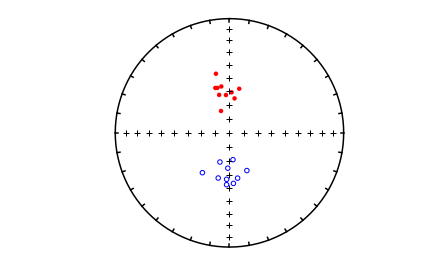

In [111]:
#read in the data into an array
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
# flip the reverse directions to their normal antipodes
normal,reverse=pmag.separate_directions(di_block)
# and plot them up
ipmag.plot_net(1)
ipmag.plot_di(di_block=normal,color='red')
ipmag.plot_di(di_block=reverse,color='b')

## squish

[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#squish.py)



This program reads in dec/inc data and "squishes" the inclinations using the formula from King 
(1955, doi: 10.1111/j.1365-246X.1955.tb06558.x)  $\tan(I_o)=flat \tan(I_f)$.  \[See also [unsquish](#unsquish)\]. 
We can call **pmag.squish()** from within the notebook.  

In [112]:
help(pmag.squish)

Help on function squish in module pmagpy.pmag:

squish(incs, f)
    returns 'flattened' inclination, assuming factor, f and King (1955) formula:
    tan (I_o) = f tan (I_f)
    
    Parameters
    __________
    incs : array of inclination (I_f)  data to flatten
    f : flattening factor
    
    Returns
    _______
    I_o :  inclinations after flattening



In [113]:
di_block=np.loadtxt('data_files/squish/squish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=0.4
fincs=pmag.squish(incs,flat)

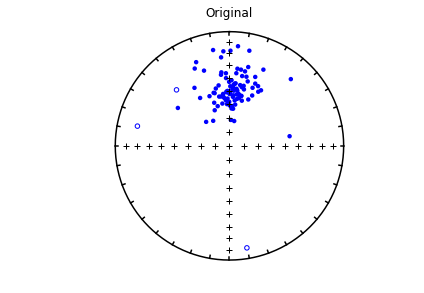

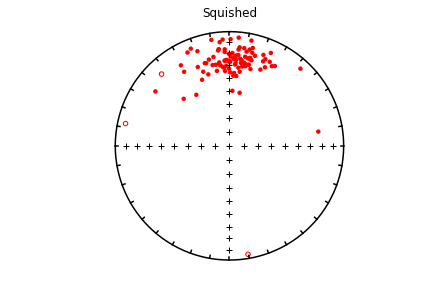

In [114]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Original',color='blue')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Squished',color='red')

## stats

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-156000813) [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#/stats.py)

This program just calculates the N, mean, sum, sigma and sigma % for data.  There are numerous ways to do that in **Numpy**, so let's just use those.

In [115]:
data=np.loadtxt('data_files/gaussian/gauss.out')
print (data.shape[0],data.mean(),data.sum(),data.std())

100 9.949869990000002 994.9869990000001 0.9533644867617789


## strip_magic

[\[Essentials Chapter 15\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch15.html)
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#strip_magic.py)

We can do this easily using the wonders of **Pandas** and **matplotlib** as demonstrated here.  

In [116]:
# read in the data
data=pd.read_csv('data_files/strip_magic/sites.txt',sep='\t',header=1)
# see what's there
data.columns

# you might have to use **df.dropna()** to clean off unwanted NaN lines or other data massaging
# but not for this example

Index(['site', 'location', 'age', 'age_unit', 'dir_dec', 'dir_inc',
       'core_depth', 'lat', 'lon', 'geologic_classes', 'geologic_types',
       'lithologies', 'citations', 'vgp_lat', 'vgp_lon', 'paleolatitude',
       'vgp_lat_rev', 'vgp_lon_rev'],
      dtype='object')

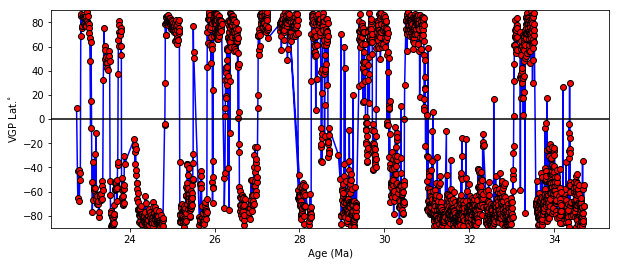

In [117]:
plt.figure(1,(10,4)) # make the figure
plt.plot(data.age,data.vgp_lat,'b-') # plot as blue line
plt.plot(data.age,data.vgp_lat,'ro',markeredgecolor="black") # plot as red dots with black rims
plt.xlabel('Age (Ma)') # label the time axis
plt.ylabel('VGP Lat.$^{\circ}$')
plt.ylim(-90,90) # set the plot limits
plt.axhline(color='black'); # put on a zero line

## sundec

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html)
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#sundec.py)

Paleomagnetists often use the sun to orient their cores, especially if the sampling site is strongly magnetic and would deflect the magnetic compass.  The information required is: where are you (e.g., latitude and longitude), what day is it, what time is it in Greenwhich Mean Time (a.k.a. Universal Time) and where is the sun (e.g., the antipode of the angle the shadow of a gnomon makes with the desired direction)?

This calculation is surprisingly accurate and is implemented in the function 
 **pmag.dosundec()**.  

In [118]:
help(pmag.dosundec)

Help on function dosundec in module pmagpy.pmag:

dosundec(sundata)
    returns the declination for a given set of suncompass data
    Parameters
    __________
      sundata : dictionary with these keys:
          date: time string with the format 'yyyy:mm:dd:hr:min'
          delta_u: time to SUBTRACT from local time for Universal time
          lat: latitude of location (negative for south)
          lon: longitude of location (negative for west)
          shadow_angle: shadow angle of the desired direction with respect to the sun.
    Returns
    ________
       sunaz : the declination of the desired direction wrt true north.




Say you (or your elderly colleague) were located at 35$^{\circ}$ N and 33$^{\circ}$ E. The local time was three hours ahead of Universal Time. The shadow angle for the drilling direction was 68$^{\circ}$  measured at 16:09 on May 23, 1994. **pmag.dosundec()** requires a dictionary with the necessary information: 

In [119]:
sundata={'delta_u':3,'lat':35,'lon':33,\
         'date':'1994:05:23:16:9','shadow_angle':68}
print ('%7.1f'%(pmag.dosundec(sundata)))

  154.2


## tk03

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html)
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#tk03.py)

Sometimes it is useful to generate a distribution of synthetic geomagnetic field vectors that you might expect to find from paleosecular variation of the geomagnetic field. The program **tk03** generates distributions of field vectors from the PSV model of Tauxe and Kent (2004, doi: 10.1029/145GM08).  This program was implemented for notebook use as **ipmag.tk03()**.  \[See also [**find_ei**](#find_ei)\]. 

In [120]:
help(ipmag.tk03)

Help on function tk03 in module pmagpy.ipmag:

tk03(n=100, dec=0, lat=0, rev='no', G2=0, G3=0)
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination. Return a nested list of
    of [dec,inc,intensity].
    
    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    
    Returns
    ----------
    tk_03_output : a nested list of declination, inclination, and intensity (in nT)
    
    Examples
    --------
    >>> ipmag.tk03(n=5, dec=0, lat=0)
    [[14.752502674158681, -36.189370642603834, 16584.848620957589],
     [9.

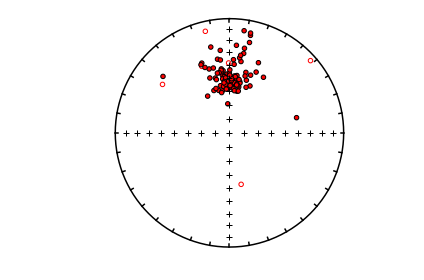

In [121]:
di_block=ipmag.tk03(lat=30)
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## uniform

[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#uniform.py)

It is at times handy to be able to generate a uniformly distributed set of directions (or geographic locations). This is done using a technique described by Fisher et al. (Fisher, N. I., Lewis, T., & Embleton, B. J. J. (1987). Statistical Analysis of Spherical Data. Cambridge: Cambridge University Press).   We do this by calling  **pmag.get_unf()**.   

In [122]:
help(pmag.get_unf)

Help on function get_unf in module pmagpy.pmag:

get_unf(N=100)
    Generates N uniformly distributed directions
    using the way described in Fisher et al. (1987).
    Parameters
    __________
    N : number of directions, default is 100
    
    Returns
    ______
    array of nested dec,inc pairs



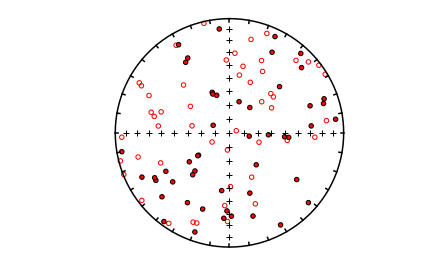

In [123]:
di_block=pmag.get_unf()
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## unsquish

[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813) 
[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-156000813) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#unsquish.py)



This program is just the inverse of [**squish**](#squish) in that it takes "squished" data and "unsquishes" them, assuming a King (1955, doi: 10.1111/j.1365-246X.1955.tb06558.x)  relationship:  $\tan(I_o)=flat \tan(I_f)$. So, $\tan(I_f) = \tan(I_o)/flat$. 

It calls **pmag.unquish()**.  

In [124]:
help(pmag.unsquish)

Help on function unsquish in module pmagpy.pmag:

unsquish(incs, f)
    returns 'unflattened' inclination, assuming factor, f and King (1955) formula:
    tan (I_o) = tan (I_f)/f
    
    Parameters
    __________
    incs : array of inclination (I_f)  data to unflatten
    f : flattening factor
    
    Returns
    _______
    I_o :  inclinations after unflattening



In [125]:
di_block=np.loadtxt('data_files/unsquish/unsquish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.unsquish(incs,flat)

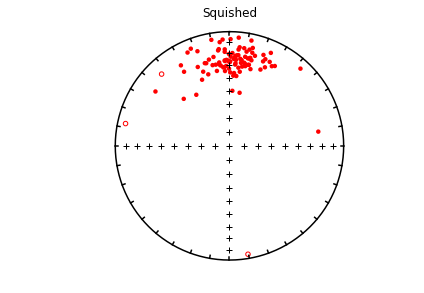

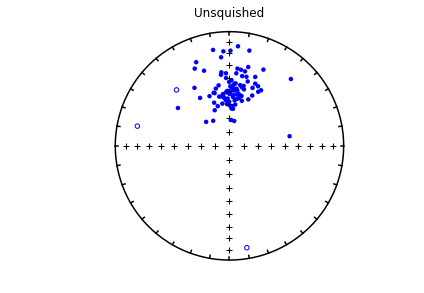

In [126]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Squished',color='red')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Unsquished',color='blue')

## vdm_b

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#vdm_b.py)



**vdm_b** is the inverse of [**b_vdm**](#b_vdm) in that it converts a virtual \[axial\] dipole moment (vdm or vadm) to a predicted geomagnetic field intensity observed at the earth's surface at a particular (paleo)latitude. This  program calls **pmag.vdm_b()**.

In [127]:
help(pmag.vdm_b)

Help on function vdm_b in module pmagpy.pmag:

vdm_b(vdm, lat)
    Converts a virtual dipole moment (VDM) or a virtual axial dipole moment
    (VADM; input in units of Am^2) to a local magnetic field value (output in
    units of tesla)
    
    Parameters
    ----------
    vdm : V(A)DM in units of Am^2
    lat: latitude of site in degrees
    
    Returns
    -------
    B: local magnetic field strength in tesla



In [128]:
print ('%7.1f microtesla'%(pmag.vdm_b(7.159e22,22)*1e6))

   33.0 microtesla


## vector_mean

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#vector_mean.py)

**vector_mean** calculates the vector mean for a set of vectors in polar coordinates (e.g., declination, inclination, intensity).  This is similar to the Fisher mean ([**gofish**](#gofish)) but uses vector length instead of unit vectors.  It calls
calls **pmag.vector_mean()**.

In [129]:
help(pmag.vector_mean)

Help on function vector_mean in module pmagpy.pmag:

vector_mean(data)
    calculates the vector mean of a given set of vectors
    Parameters
    __________
    data :  nested array of [dec,inc,intensity]
    
    Returns
    _______
    dir : array of [dec, inc, 1]
    R : resultant vector length



In [130]:
data=np.loadtxt('data_files/vector_mean/vector_mean_example.dat')
Dir,R=pmag.vector_mean(data)
print (('%i %7.1f %7.1f %f')%(data.shape[0],Dir[0],Dir[1],R))

100     1.3    49.6 2289431.981383


## vgp_di

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#vgp_di.py)


We use **vgp_di** to convert virtual geomagnetic pole positions to predicted directions at a given location.  \[See also [**di_vgp**](#di_vgp)\].

This program uses the function **pmag.vgp_di()**.  

In [131]:
help(pmag.vgp_di)

Help on function vgp_di in module pmagpy.pmag:

vgp_di(plat, plong, slat, slong)
    Converts a pole position (pole latitude, pole longitude) to a direction
    (declination, inclination) at a given location (slat, slong) assuming a
    dipolar field.
    
    Parameters
    ----------
    plat : latitude of pole (vgp latitude)
    plong : longitude of pole (vgp longitude)
    slat : latitude of site
    slong : longitude of site
    
    Returns
    ----------
    dec,inc : tuple of declination and inclination



In [132]:
d,i=pmag.vgp_di(68,191,33,243)
print ('%7.1f %7.1f'%(d,i))

  335.6    62.9


## watsons_f

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](https://pmagpy.github.io/PmagPy-cli.html#watsons_f.py)

There are several different ways of testing whether two sets of directional data share a common mean.  One popular (although perhaps not the best) way is to use Watson's F test (Watson, 1956, doi: 10.1111/j.1365-246X.1956.tb05560.x).   \[See also [**watsons_v**](#watsons_v) or  Lisa Tauxe's bootstrap way: [**common_mean**](#common_mean)\].  

If you still want to use Waston's F, then try 
 **pmag.watsons_f()** for this.

In [133]:
help(pmag.watsons_f)

Help on function watsons_f in module pmagpy.pmag:

watsons_f(DI1, DI2)
    calculates Watson's F statistic (equation 11.16 in Essentials text book).
    
    Parameters
    _________
    DI1 : nested array of [Dec,Inc] pairs
    DI2 : nested array of [Dec,Inc] pairs
    
    Returns
    _______
    F : Watson's F
    Fcrit : critical value from F table



In [134]:
DI1=np.loadtxt('data_files/watsons_f/watsons_f_example_file1.dat')
DI2=np.loadtxt('data_files/watsons_f/watsons_f_example_file2.dat')
F,Fcrit=pmag.watsons_f(DI1,DI2)
print ('%7.2f %7.2f'%(F,Fcrit))

   5.23    3.26
